In [1]:
import json
import pickle
import numpy as np
import pandas as pd


with open('variable.json', 'r') as f:
    data = json.load(f)
columns = data['my_variable']
print(len(columns))  # Output: Hello, World!

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('PCA.pkl', 'rb') as f:
    pca = pickle.load(f)


with open('dt2_model.sav', 'rb') as f:
    dt2 = pickle.load(f)

print(type(pca))
print(type(scaler))
print(type(dt2))

803
<class 'sklearn.decomposition._pca.PCA'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [2]:
combined_dataset = np.load('../Data/combined_dataset.npy')
print(f"Loaded dataset shape: {combined_dataset.shape}")

X_test_real_reshaped = combined_dataset
y_test_reshaped= np.array([1,2,3,4,5,6]*4)
print(f"X_test_real_reshaped shape: {X_test_real_reshaped.shape}")
print(f"y_test_reshaped shape: {y_test_reshaped.shape}")

Loaded dataset shape: (24, 500, 3)
X_test_real_reshaped shape: (24, 500, 3)
y_test_reshaped shape: (24,)


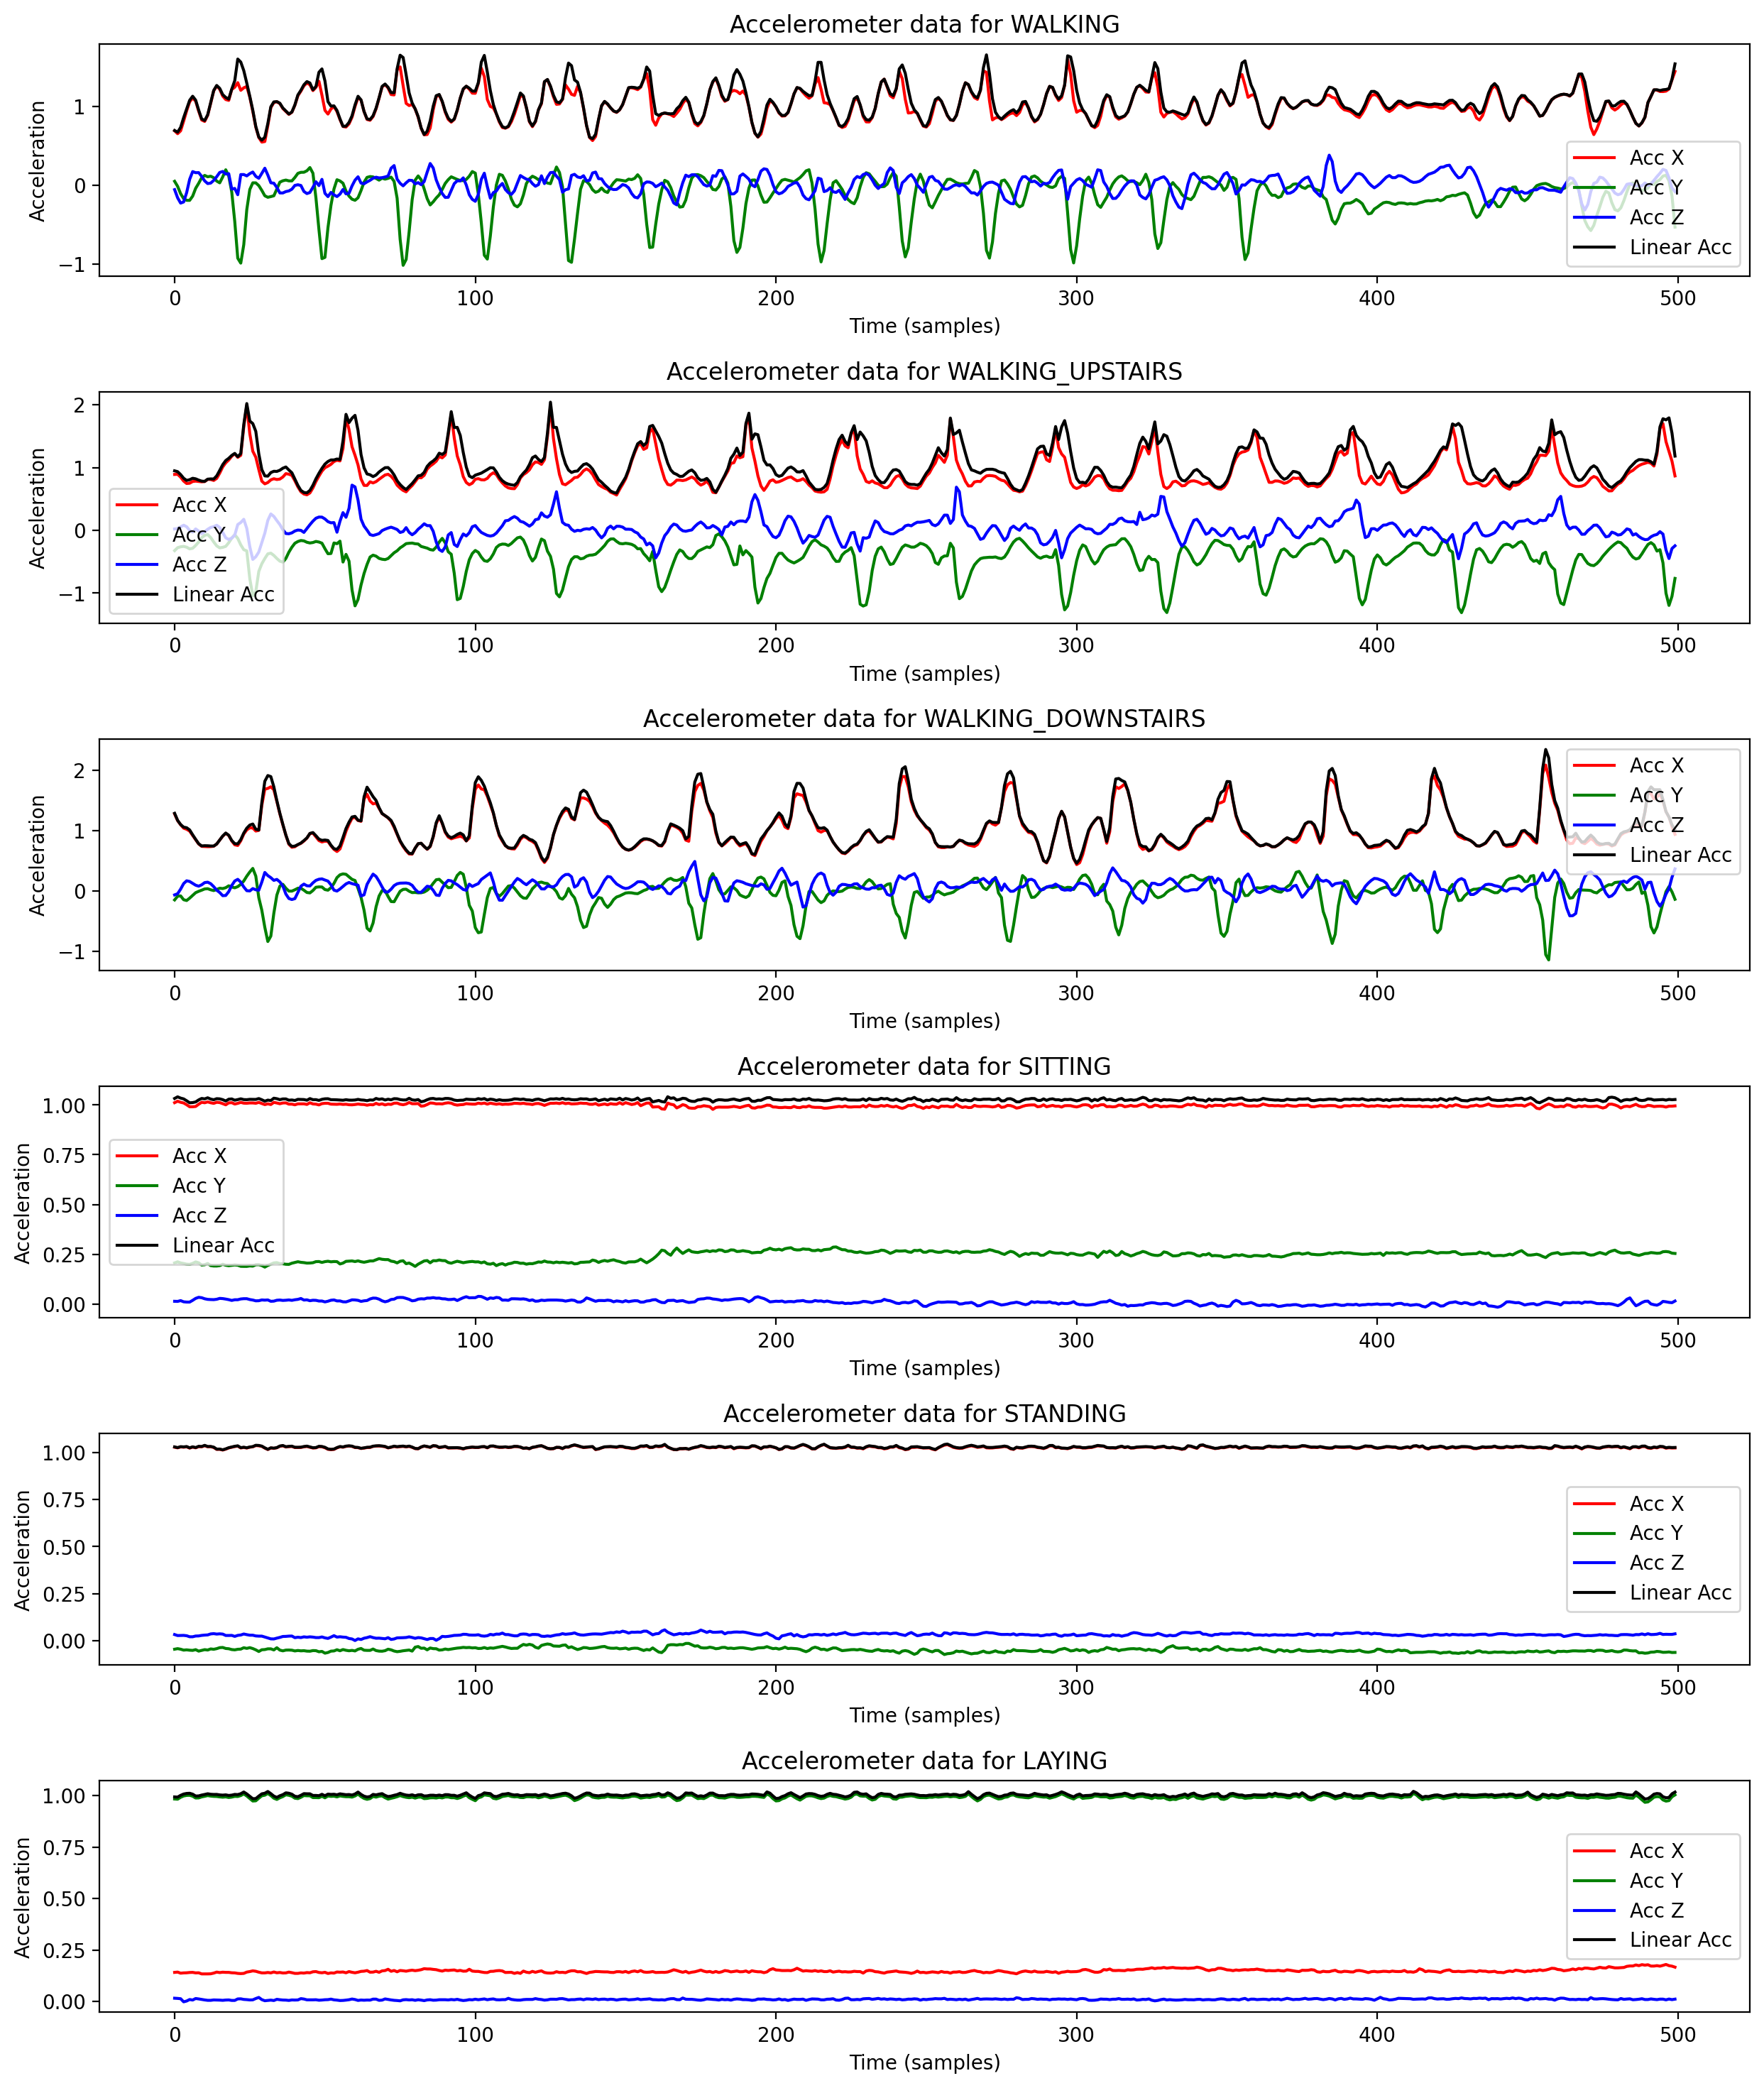

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# mapping class labels to activity names , as provided in activity_labels.txt
classes = {1: "WALKING", 2: "WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6: "LAYING"}


activity_samples = {}# stores one sample from each activity class
for activity_class, activity_name in classes.items():
    activity_samples[activity_name] = X_test_real_reshaped[y_test_reshaped == activity_class][0]

# Set up the figure and gridspec
fig = plt.figure(figsize=(15, 18))
gs = gridspec.GridSpec(len(classes), 1, hspace=0.5)

# Plot each activity's accelerometer data along with the linear acceleration
for i, (activity_name, sample) in enumerate(activity_samples.items()):
    ax = fig.add_subplot(gs[i, 0])
    
    # Calculate linear acceleration
    linear_acc = np.sqrt(np.sum(sample**2, axis=1))
    
    # Plot the x, y, z acceleration data
    ax.plot(sample[:, 0], label='Acc X', color='red')
    ax.plot(sample[:, 1], label='Acc Y', color='green')
    ax.plot(sample[:, 2], label='Acc Z', color='blue')
    
    # Plot the linear acceleration
    ax.plot(linear_acc, label='Linear Acc', color='black')
    
    ax.set_title(f"Accelerometer data for {activity_name}")
    ax.set_xlabel("Time (samples)")
    ax.set_ylabel("Acceleration")
    ax.legend()

plt.show()

X_train_tsfel_reshaped: (24, 500, 3)


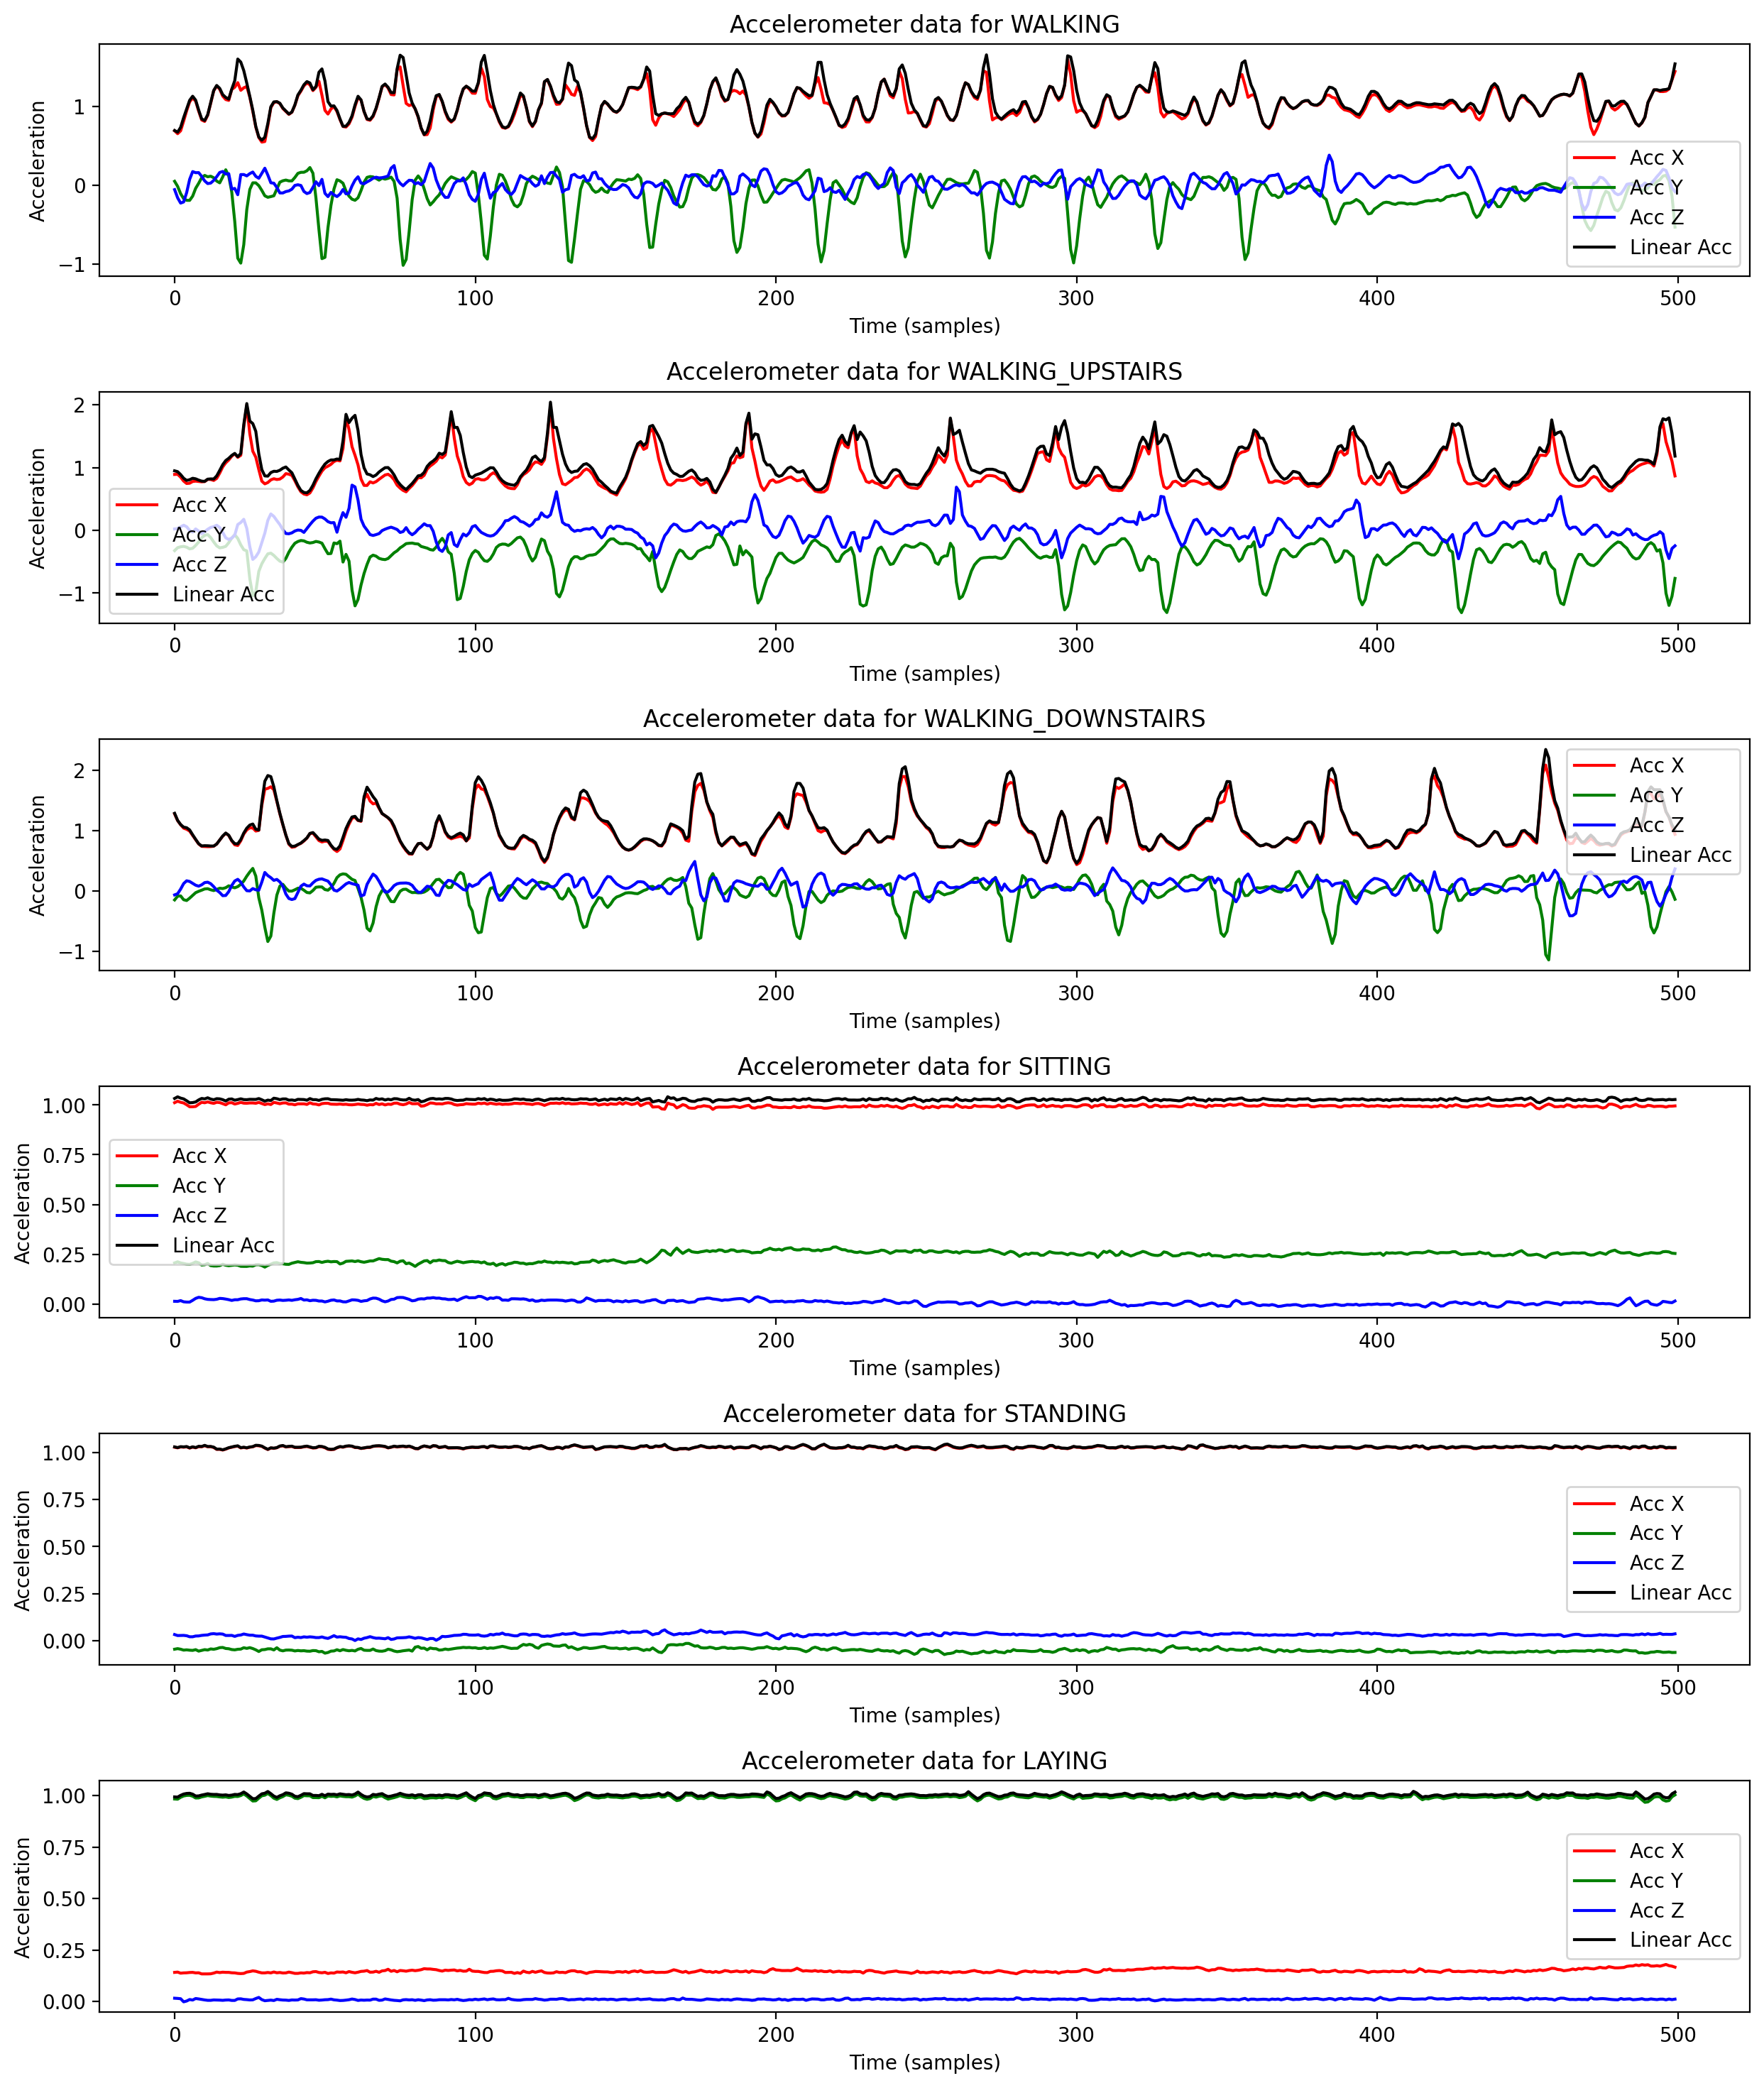

In [4]:

X_test_real_reshaped_shuffled = X_test_real_reshaped
print(f"X_train_tsfel_reshaped: {X_test_real_reshaped.shape}")

# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# mapping class labels to activity names , as provided in activity_labels.txt
classes = {1: "WALKING", 2: "WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6: "LAYING"}


activity_samples = {}# stores one sample from each activity class
for activity_class, activity_name in classes.items():
    activity_samples[activity_name] = X_test_real_reshaped_shuffled[y_test_reshaped == activity_class][0]
    
# Set up the figure and gridspec
fig = plt.figure(figsize=(15, 18))
gs = gridspec.GridSpec(len(classes), 1, hspace=0.5)

# Plot each activity's accelerometer data along with the linear acceleration
for i, (activity_name, sample) in enumerate(activity_samples.items()):
    ax = fig.add_subplot(gs[i, 0])
    
    # Calculate linear acceleration
    linear_acc = np.sqrt(np.sum(sample**2, axis=1))
    
    # Plot the x, y, z acceleration data
    ax.plot(sample[:, 0], label='Acc X', color='red')
    ax.plot(sample[:, 1], label='Acc Y', color='green')
    ax.plot(sample[:, 2], label='Acc Z', color='blue')
    
    # Plot the linear acceleration
    ax.plot(linear_acc, label='Linear Acc', color='black')
    
    ax.set_title(f"Accelerometer data for {activity_name}")
    ax.set_xlabel("Time (samples)")
    
    ax.set_ylabel("Acceleration")
    ax.legend()

plt.show()

In [5]:
X_test_real_reshaped =  X_test_real_reshaped_shuffled 

In [6]:

import tsfel
import numpy as np
import pandas as pd

# Extract features using TSFEL
cfg = tsfel.get_features_by_domain()  # Get all features by default
X_test_real_tsfel = tsfel.time_series_features_extractor(cfg, X_test_real_reshaped, verbose=1, fs=50)

y_test_real_tsfel = y_test_reshaped


# Convert to DataFrame to retain column names
X_test_real_tsfel_df = pd.DataFrame(X_test_real_tsfel)
print(X_test_real_tsfel_df.columns)

X_test_normalized_columns = columns

# Find the intersection
matching_columns = [col for col in X_test_normalized_columns if col in X_test_real_tsfel_df.columns]

print("Matching columns in X_test_real_tsfel:")
print(matching_columns)

# Filter X_test_real_tsfel_df to include only the matching columns
X_test_real_tsfel_filtered_df = X_test_real_tsfel_df[matching_columns]

print("Shape of filtered X_test_real_tsfel:")
print(X_test_real_tsfel_filtered_df.shape)

*** Feature extraction started ***



*** Feature extraction finished ***
Index(['0_Absolute energy', '0_Area under the curve', '0_Autocorrelation',
       '0_Average power', '0_Centroid', '0_ECDF Percentile Count_0',
       '0_ECDF Percentile Count_1', '0_ECDF Percentile_0',
       '0_ECDF Percentile_1', '0_ECDF_0',
       ...
       '2_Wavelet variance_0', '2_Wavelet variance_1', '2_Wavelet variance_2',
       '2_Wavelet variance_3', '2_Wavelet variance_4', '2_Wavelet variance_5',
       '2_Wavelet variance_6', '2_Wavelet variance_7', '2_Wavelet variance_8',
       '2_Zero crossing rate'],
      dtype='object', length=1152)
Matching columns in X_test_real_tsfel:
['0_Absolute energy', '0_Autocorrelation', '0_Centroid', '0_ECDF Percentile_0', '0_Entropy', '0_FFT mean coefficient_0', '0_FFT mean coefficient_1', '0_FFT mean coefficient_10', '0_FFT mean coefficient_100', '0_FFT mean coefficient_101', '0_FFT mean coefficient_102', '0_FFT mean coefficient_103', '0_FFT mean coefficient_104', '0_FFT mean coefficient_105', '0_FFT

In [7]:

X_test_real_tsfel = X_test_real_tsfel_filtered_df.to_numpy()
X_test_normalized_real = scaler.transform(X_test_real_tsfel)

# Apply PCA
X_test_pca_20_real = pca.transform(X_test_normalized_real)

print("X_test_pca shape: ", X_test_pca_20_real.shape)

X_test_pca shape:  (24, 20)


c:\Users\Soham\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [8]:
# Make predictions
from sklearn import metrics

y_tsfel_pred = dt2.predict(X_test_pca_20_real)

# Ensure y_test_real_tsfel and y_tsfel_pred are numpy arrays
y_test_real_tsfel = np.array(y_test_real_tsfel)
y_tsfel_pred = np.array(y_tsfel_pred)

# Calculate metrics
accuracy = metrics.accuracy_score(y_test_real_tsfel, y_tsfel_pred)
precision = metrics.precision_score(y_test_real_tsfel, y_tsfel_pred, average='macro')
recall = metrics.recall_score(y_test_real_tsfel, y_tsfel_pred, average='macro')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

# Create and display comparison DataFrame
comparison_df = pd.DataFrame({
    'True Label': y_test_real_tsfel,
    'Predicted Label': y_tsfel_pred
})

# Display the DataFrame
print(comparison_df)  # Use print for debugging purposes

Accuracy:  0.375
Precision:  0.2846153846153846
Recall:  0.375
    True Label  Predicted Label
0            1                3
1            2                3
2            3                3
3            4                6
4            5                6
5            6                6
6            1                3
7            2                6
8            3                3
9            4                6
10           5                6
11           6                6
12           1                3
13           2                3
14           3                3
15           4                6
16           5                6
17           6                6
18           1                3
19           2                2
20           3                3
21           4                6
22           5                6
23           6                6


c:\Users\Soham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


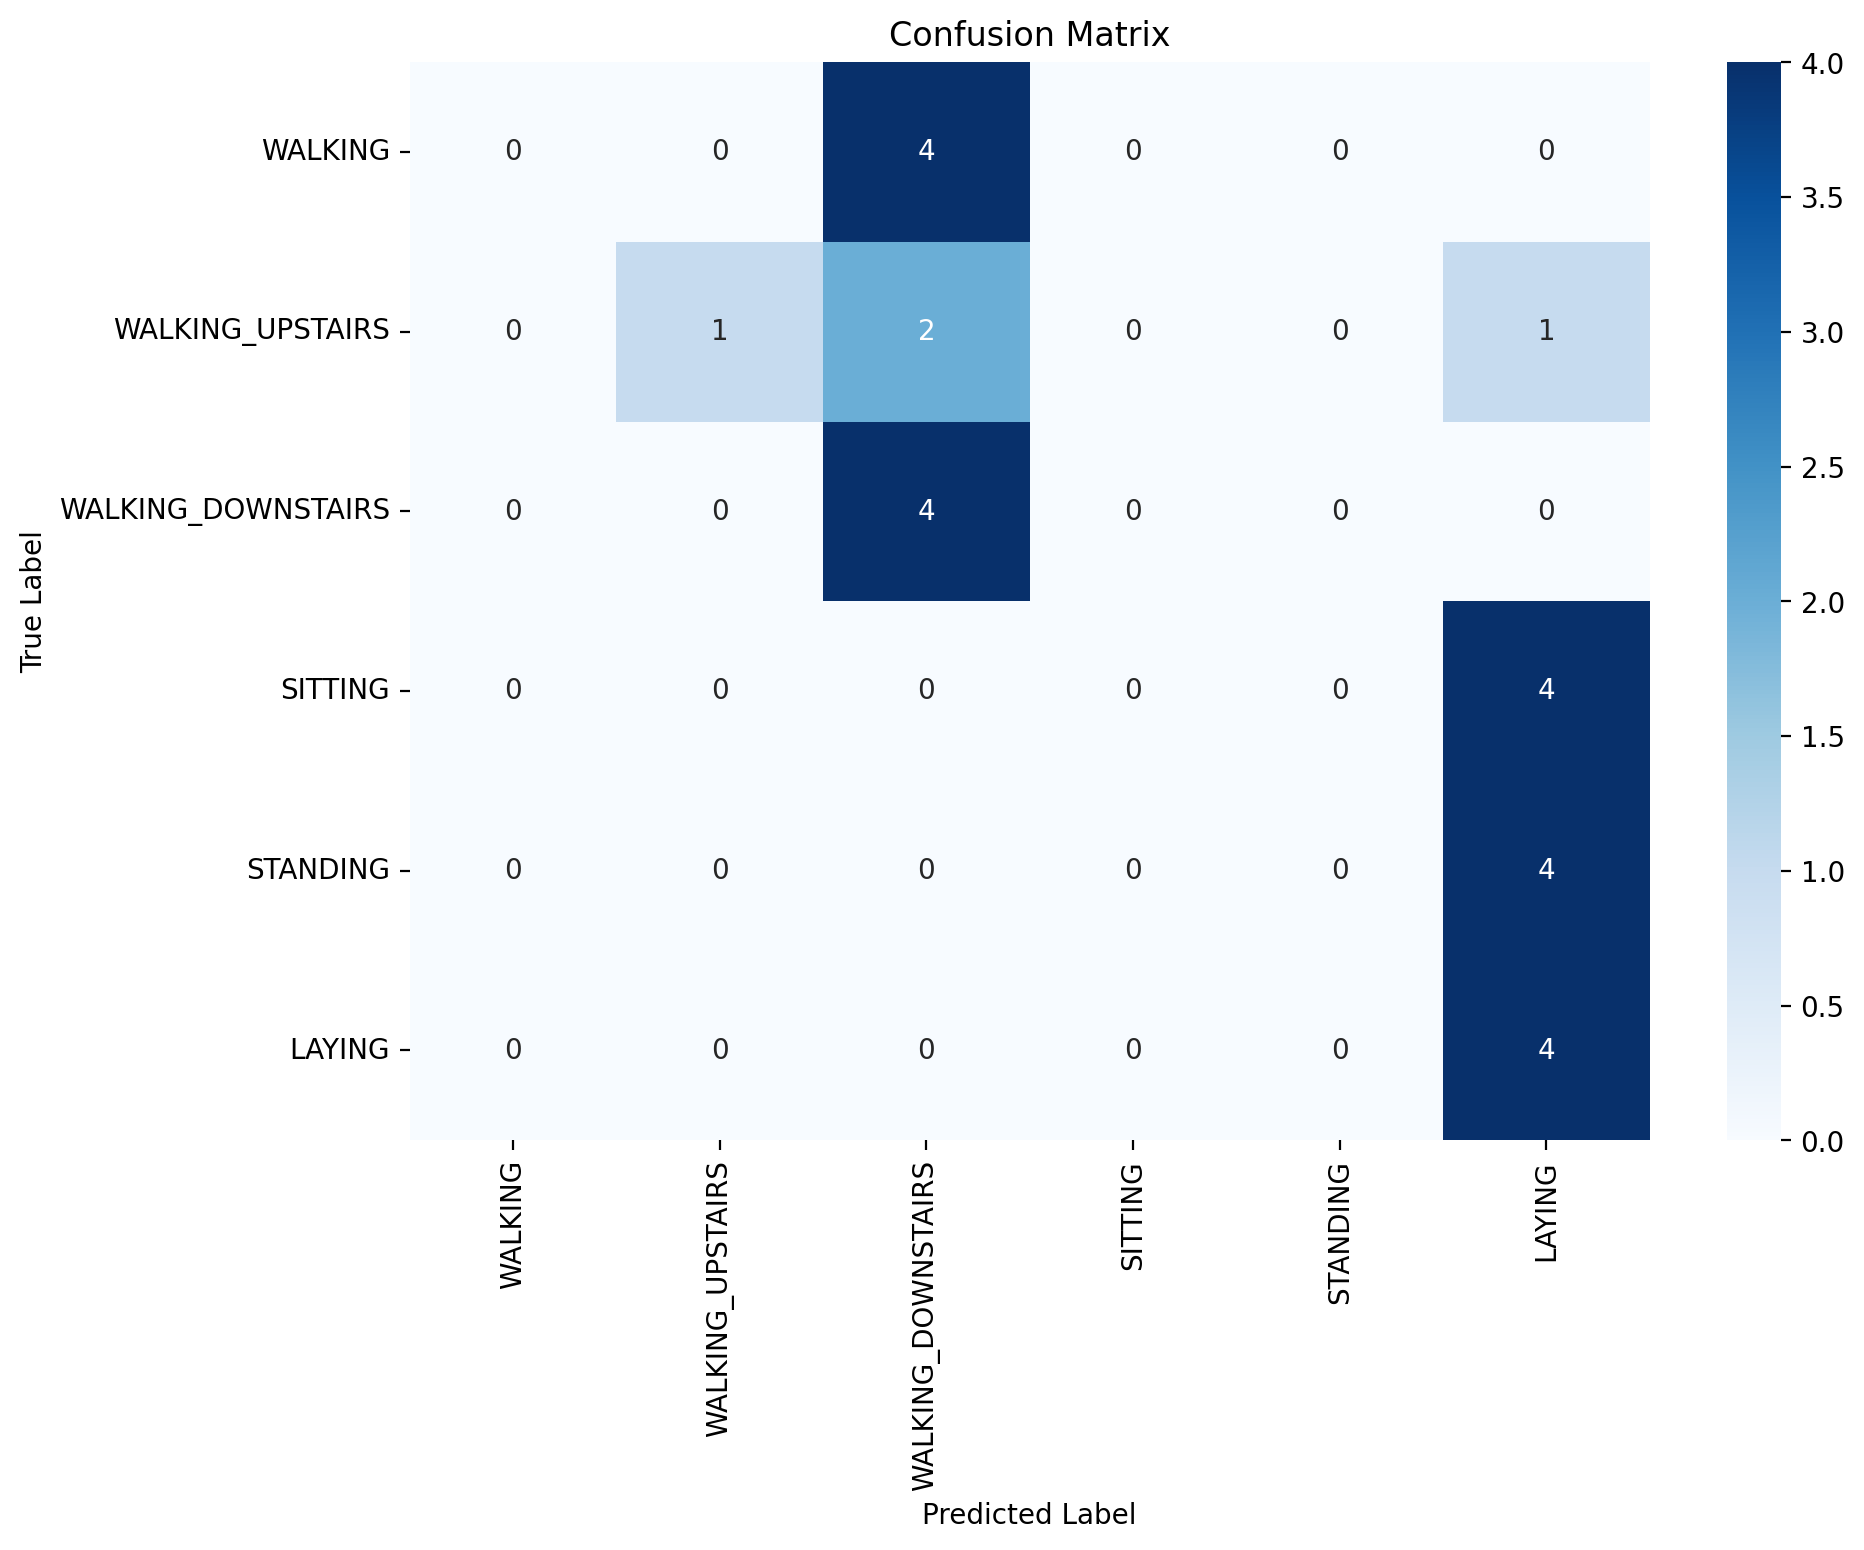

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_real_tsfel, y_tsfel_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes.values(), yticklabels=classes.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



